In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
data = pd.read_csv("Chennai_Property_Price.csv")
data.head()

,property_type,seller_name,price(rs),area_insqft,location
0,3 BHK Apartment,Mahalakshmi Associates Pvt Ltd,11295000,1506,Madhanandapuram
1,4 BHK Villa,Jehovah Builders,23400000,2600,Porur
2,1 BHK Apartment,Sree Aishwaryam,3287221,469,Medavakkam
3,2 BHK Apartment,MP Developers,5614400,968,Pammal
4,1 BHK Apartment,Baashyaam Group,1420800,444,Thandalam


In [3]:
data.shape

(4980, 5)

In [4]:
data.drop(['seller_name'],axis='columns',inplace = True)

In [5]:
data

,property_type,price(rs),area_insqft,location
0,3 BHK Apartment,11295000,1506,Madhanandapuram
1,4 BHK Villa,23400000,2600,Porur
2,1 BHK Apartment,3287221,469,Medavakkam
3,2 BHK Apartment,5614400,968,Pammal
4,1 BHK Apartment,1420800,444,Thandalam
...,...,...,...,...
4975,1 BHK Apartment,6200205,583,Manapakkam
4976,2 BHK Apartment,5499780,572,Manapakkam
4977,2 BHK Apartment,5700183,577,Manapakkam
4978,2 BHK Apartment,5500275,565,Manapakkam


In [6]:
data.isnull().sum()

property_type    0
price(rs)        0
area_insqft      0
location         3
dtype: int64

In [7]:
data.dropna(inplace= True)

In [8]:
data

,property_type,price(rs),area_insqft,location
0,3 BHK Apartment,11295000,1506,Madhanandapuram
1,4 BHK Villa,23400000,2600,Porur
2,1 BHK Apartment,3287221,469,Medavakkam
3,2 BHK Apartment,5614400,968,Pammal
4,1 BHK Apartment,1420800,444,Thandalam
...,...,...,...,...
4975,1 BHK Apartment,6200205,583,Manapakkam
4976,2 BHK Apartment,5499780,572,Manapakkam
4977,2 BHK Apartment,5700183,577,Manapakkam
4978,2 BHK Apartment,5500275,565,Manapakkam


In [9]:
data.isnull().sum()

property_type    0
price(rs)        0
area_insqft      0
location         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4977 entries, 0 to 4979
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_type  4977 non-null   object
 1   price(rs)      4977 non-null   int64 
 2   area_insqft    4977 non-null   int64 
 3   location       4977 non-null   object
dtypes: int64(2), object(2)
memory usage: 194.4+ KB


In [11]:
data.describe(include='all')

,property_type,price(rs),area_insqft,location
count,4977,4.977000e+03,4977.000000,4977
unique,28,NaN,NaN,246
top,2 BHK Apartment,NaN,NaN,Medavakkam
freq,1846,NaN,NaN,295
mean,NaN,1.021747e+07,1251.579666,NaN
std,NaN,1.185760e+07,662.160109,NaN
min,NaN,8.569200e+05,111.000000,NaN
25%,NaN,5.411400e+06,901.000000,NaN
50%,NaN,7.411110e+06,1119.000000,NaN
75%,NaN,1.070000e+07,1415.000000,NaN


In [12]:
# EDA

In [ ]:
# Univariate Analysis

In [13]:
import seaborn as sns

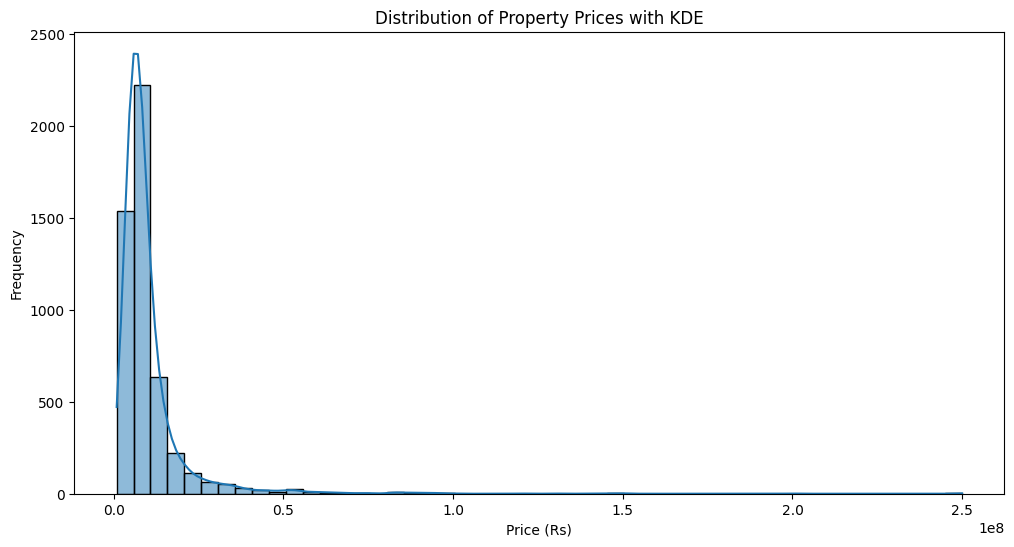

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data['price(rs)'], kde=True, bins=50)
plt.title('Distribution of Property Prices with KDE')
plt.xlabel('Price (Rs)')
plt.ylabel('Frequency')
plt.show()

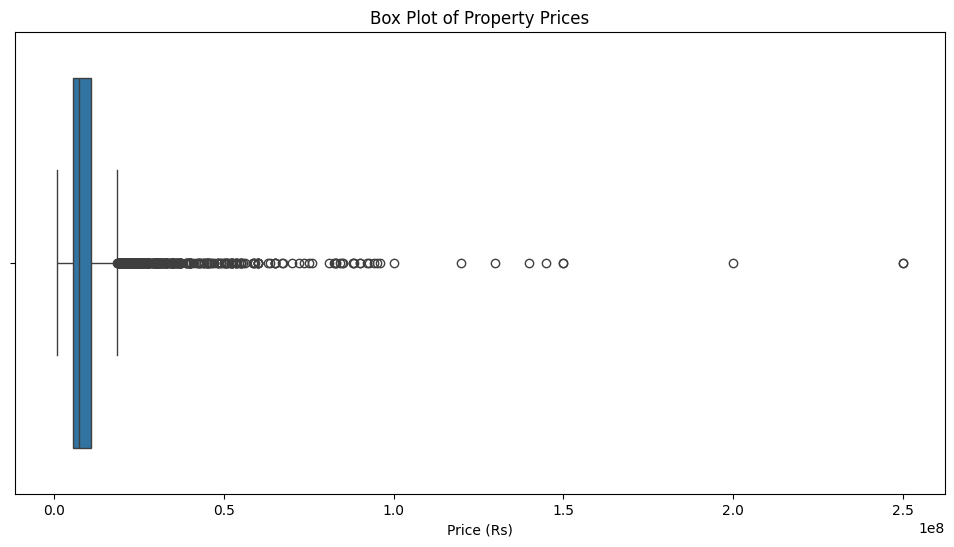

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price(rs)'])
plt.title('Box Plot of Property Prices')
plt.xlabel('Price (Rs)')
plt.show()

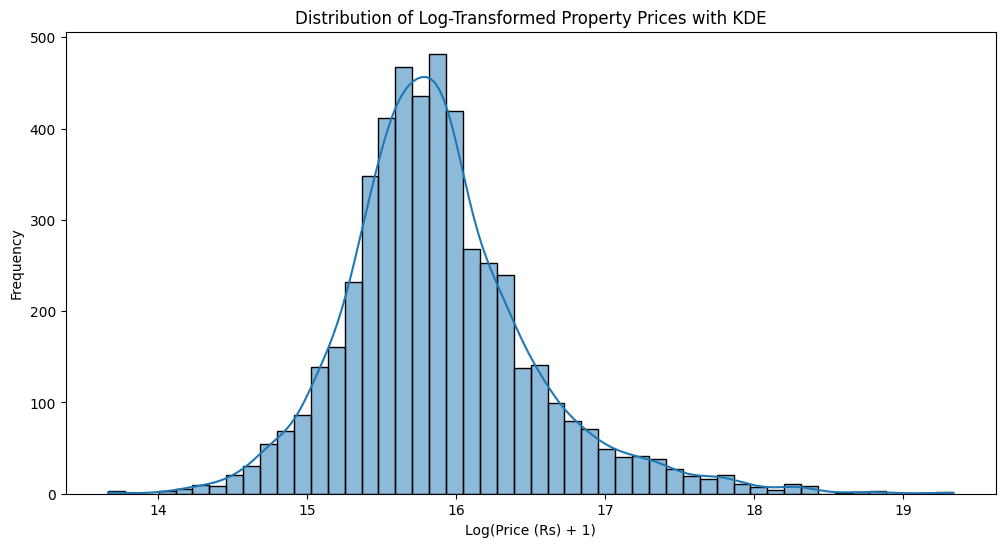

In [16]:
data['log_price'] = np.log(data['price(rs)'] + 1)
plt.figure(figsize=(12, 6))
sns.histplot(data['log_price'], kde=True, bins=50)
plt.title('Distribution of Log-Transformed Property Prices with KDE')
plt.xlabel('Log(Price (Rs) + 1)')
plt.ylabel('Frequency')
plt.show()

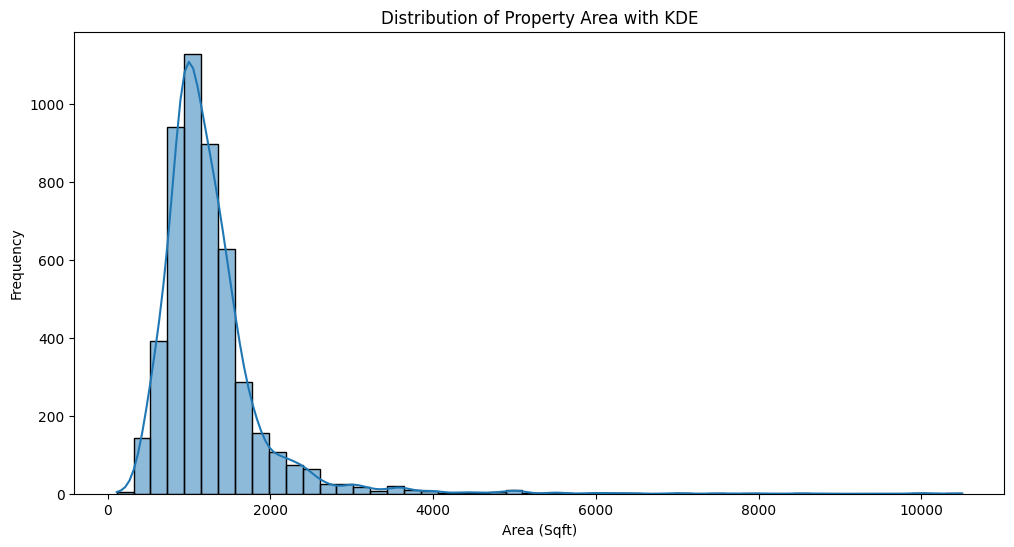

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data['area_insqft'], kde=True, bins=50)
plt.title('Distribution of Property Area with KDE')
plt.xlabel('Area (Sqft)')
plt.ylabel('Frequency')
plt.show()


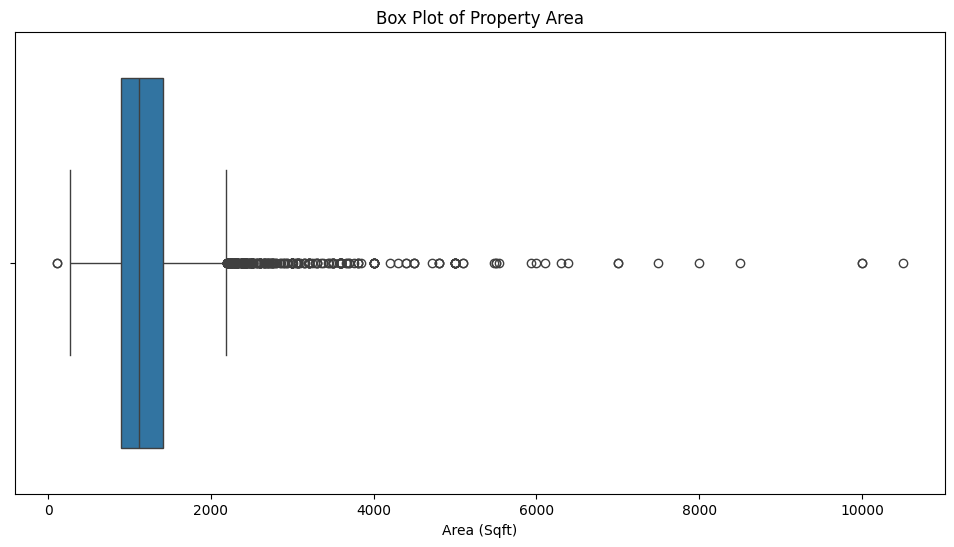

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['area_insqft'])
plt.title('Box Plot of Property Area')
plt.xlabel('Area (Sqft)')
plt.show()

In [19]:
# Categorical Analysis

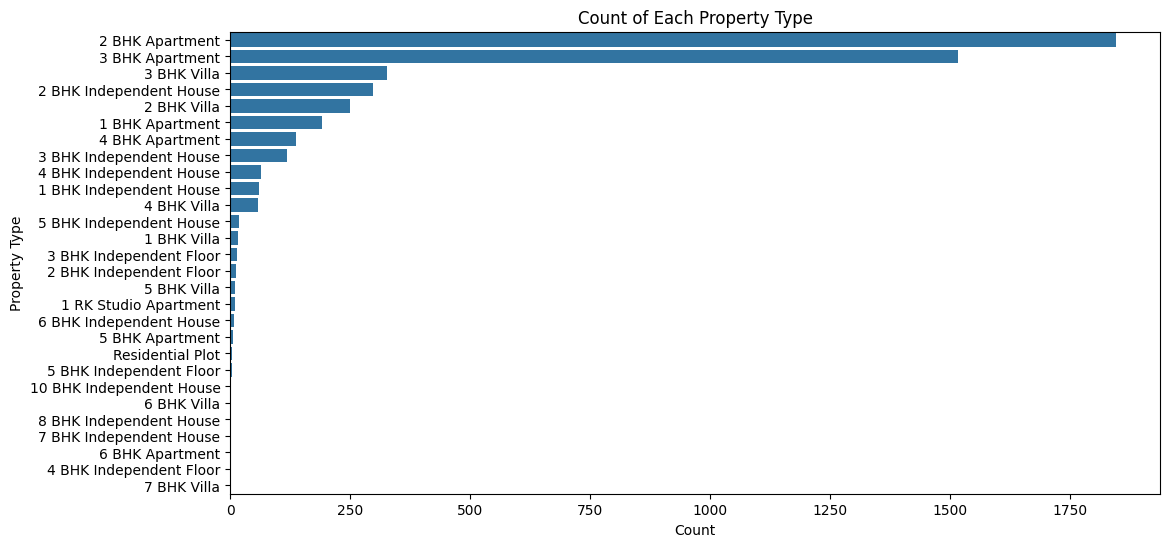

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y=data['property_type'], order=data['property_type'].value_counts().index)
plt.title('Count of Each Property Type')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

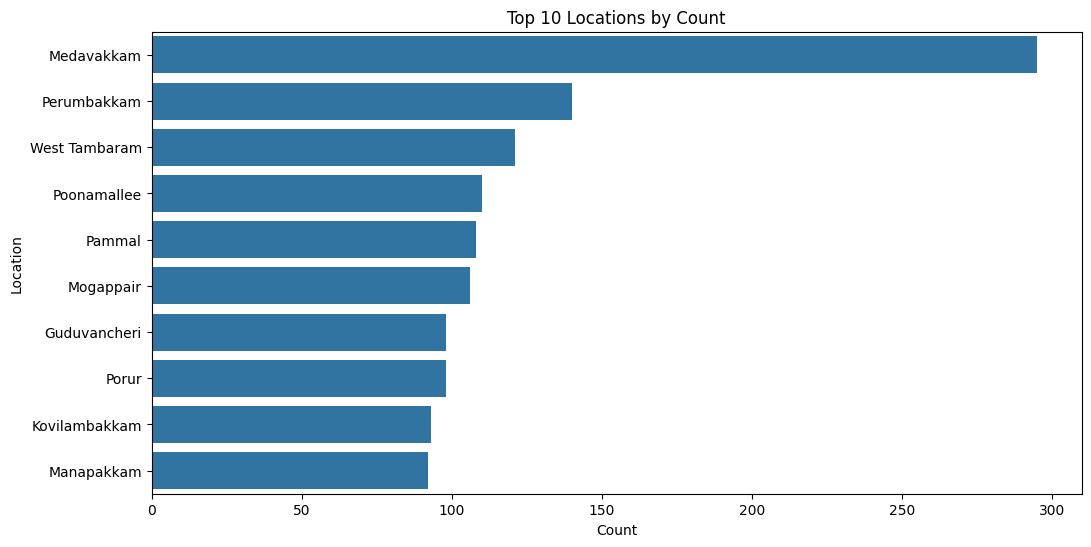

In [21]:
plt.figure(figsize=(12, 6))
top_locations = data['location'].value_counts().nlargest(10)
sns.barplot(y=top_locations.index, x=top_locations.values)
plt.title('Top 10 Locations by Count')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

In [22]:
# Bivariate Analysis

In [ ]:
# Plot vs Area

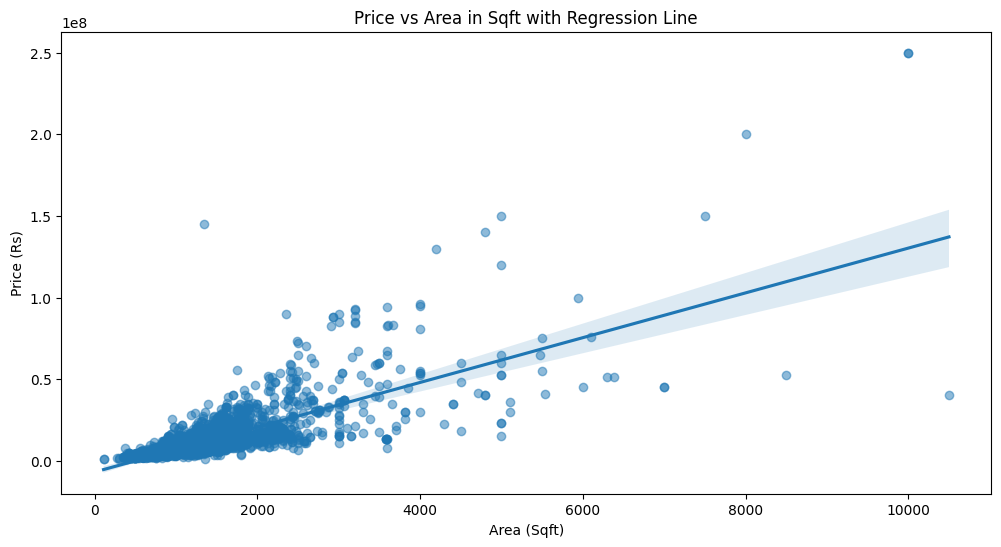

In [23]:
plt.figure(figsize=(12, 6))
sns.regplot(x='area_insqft', y='price(rs)', data=data, scatter_kws={'alpha':0.5})
plt.title('Price vs Area in Sqft with Regression Line')
plt.xlabel('Area (Sqft)')
plt.ylabel('Price (Rs)')
plt.show()


In [ ]:
# Price vs Area with Property Type

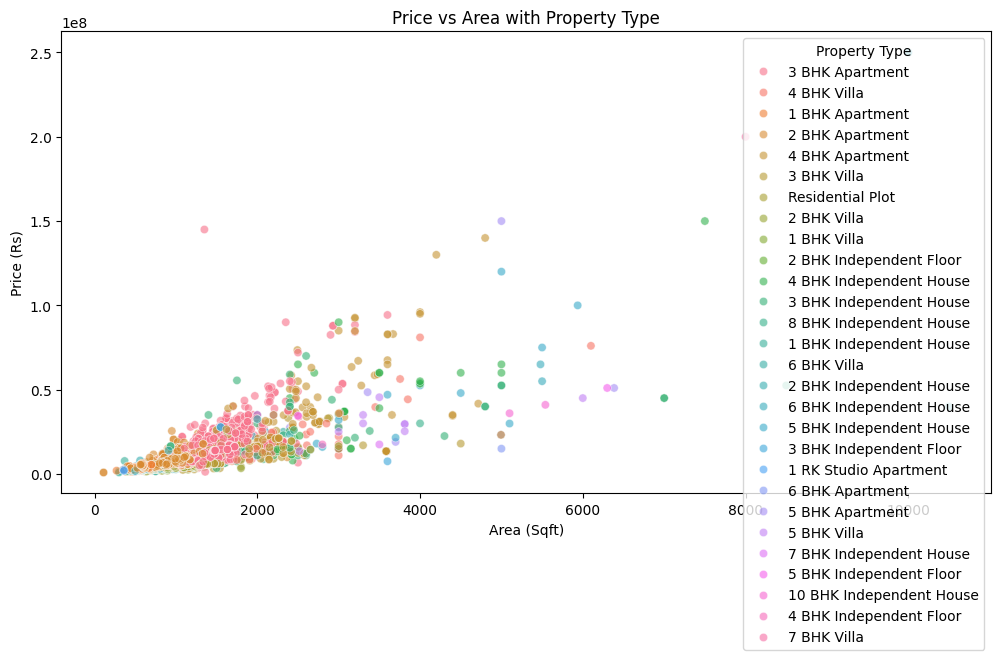

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area_insqft', y='price(rs)', hue='property_type', data=data, alpha=0.6)
plt.title('Price vs Area with Property Type')
plt.xlabel('Area (Sqft)')
plt.ylabel('Price (Rs)')
plt.legend(title='Property Type')
plt.show()

In [25]:
# Price by Property Type:

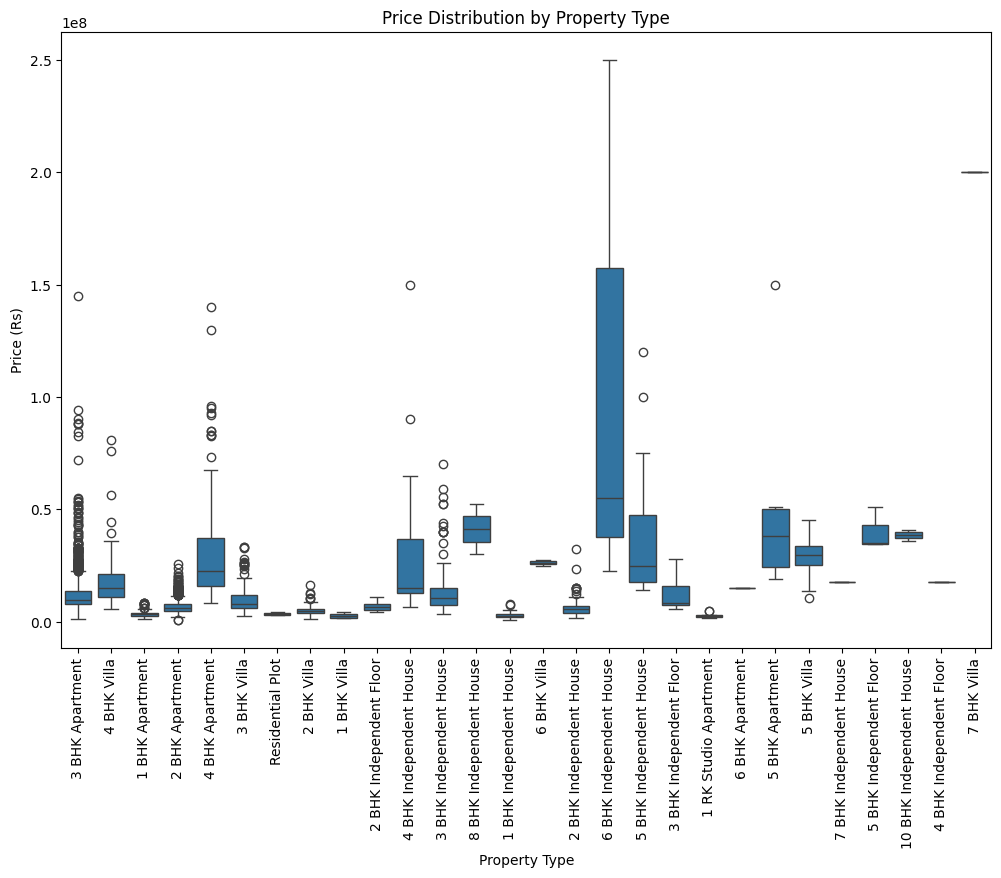

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='price(rs)', data=data)
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Price (Rs)')
plt.show()

In [27]:
# Price by Location:

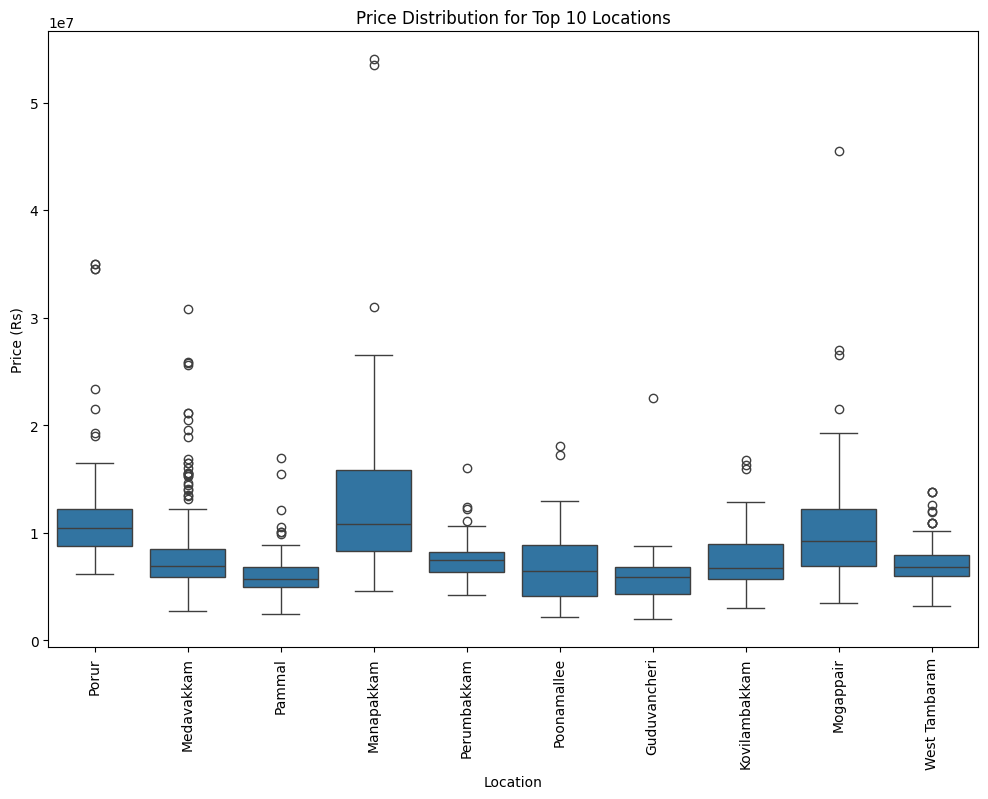

In [28]:
top_locations = data['location'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(x='location', y='price(rs)', data=data[data['location'].isin(top_locations)])
plt.title('Price Distribution for Top 10 Locations')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Price (Rs)')
plt.show()

In [29]:
# Correlation Analysis

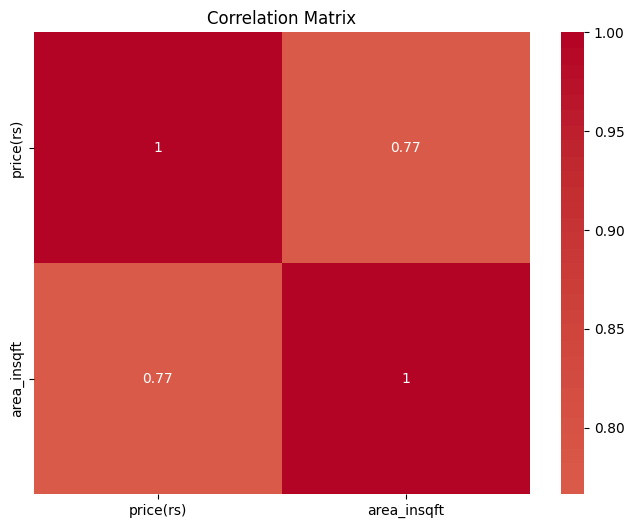

In [30]:
correlation_matrix = data[['price(rs)', 'area_insqft']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Pairwise Relationships:

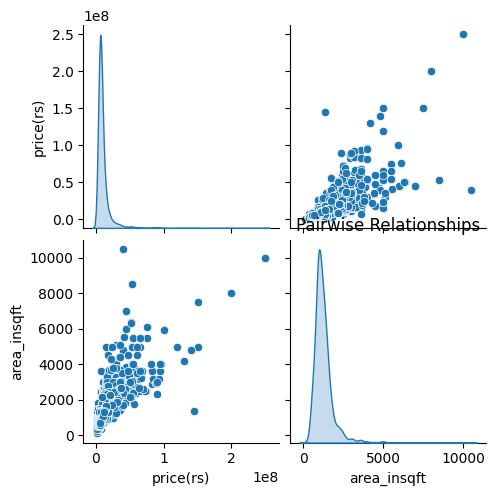

In [31]:
sns.pairplot(data[['price(rs)', 'area_insqft']], diag_kind='kde')
plt.title('Pairwise Relationships')
plt.show()

In [32]:
# Data Cleaning

In [33]:
data

,property_type,price(rs),area_insqft,location,log_price
0,3 BHK Apartment,11295000,1506,Madhanandapuram,16.239871
1,4 BHK Villa,23400000,2600,Porur,16.968247
2,1 BHK Apartment,3287221,469,Medavakkam,15.005553
3,2 BHK Apartment,5614400,968,Pammal,15.540845
4,1 BHK Apartment,1420800,444,Thandalam,14.166731
...,...,...,...,...,...
4975,1 BHK Apartment,6200205,583,Manapakkam,15.640093
4976,2 BHK Apartment,5499780,572,Manapakkam,15.520219
4977,2 BHK Apartment,5700183,577,Manapakkam,15.556009
4978,2 BHK Apartment,5500275,565,Manapakkam,15.520309


In [34]:
data.dropna(inplace=True)

In [36]:
data.isnull().sum()

property_type    0
price(rs)        0
area_insqft      0
location         0
log_price        0
dtype: int64

In [37]:
data.shape

(4977, 5)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4977 entries, 0 to 4979
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  4977 non-null   object 
 1   price(rs)      4977 non-null   int64  
 2   area_insqft    4977 non-null   int64  
 3   location       4977 non-null   object 
 4   log_price      4977 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 233.3+ KB


In [39]:
data['price(rs)'] = data['price(rs)'].astype(float)
data['area_insqft'] = data['area_insqft'].astype(float)
data['property_type'] = data['property_type'].astype('category')
data['location'] = data['location'].astype('category')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4977 entries, 0 to 4979
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   property_type  4977 non-null   category
 1   price(rs)      4977 non-null   float64 
 2   area_insqft    4977 non-null   float64 
 3   location       4977 non-null   category
 4   log_price      4977 non-null   float64 
dtypes: category(2), float64(3)
memory usage: 181.4 KB


In [41]:
# Z-score

In [42]:
from scipy import stats

In [43]:
z_scores = np.abs(stats.zscore(data[['price(rs)', 'area_insqft']]))
data = data[(z_scores < 3).all(axis=1)]

In [44]:
data

,property_type,price(rs),area_insqft,location,log_price
0,3 BHK Apartment,11295000.0,1506.0,Madhanandapuram,16.239871
1,4 BHK Villa,23400000.0,2600.0,Porur,16.968247
2,1 BHK Apartment,3287221.0,469.0,Medavakkam,15.005553
3,2 BHK Apartment,5614400.0,968.0,Pammal,15.540845
4,1 BHK Apartment,1420800.0,444.0,Thandalam,14.166731
...,...,...,...,...,...
4975,1 BHK Apartment,6200205.0,583.0,Manapakkam,15.640093
4976,2 BHK Apartment,5499780.0,572.0,Manapakkam,15.520219
4977,2 BHK Apartment,5700183.0,577.0,Manapakkam,15.556009
4978,2 BHK Apartment,5500275.0,565.0,Manapakkam,15.520309


In [45]:
Q1 = data[['price(rs)', 'area_insqft']].quantile(0.25)
Q3 = data[['price(rs)', 'area_insqft']].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[['price(rs)', 'area_insqft']] < (Q1 - 1.5 * IQR)) | (data[['price(rs)', 'area_insqft']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
data

,property_type,price(rs),area_insqft,location,log_price
0,3 BHK Apartment,11295000.0,1506.0,Madhanandapuram,16.239871
2,1 BHK Apartment,3287221.0,469.0,Medavakkam,15.005553
3,2 BHK Apartment,5614400.0,968.0,Pammal,15.540845
4,1 BHK Apartment,1420800.0,444.0,Thandalam,14.166731
5,2 BHK Apartment,5015000.0,1003.0,Kundrathur,15.427944
...,...,...,...,...,...
4975,1 BHK Apartment,6200205.0,583.0,Manapakkam,15.640093
4976,2 BHK Apartment,5499780.0,572.0,Manapakkam,15.520219
4977,2 BHK Apartment,5700183.0,577.0,Manapakkam,15.556009
4978,2 BHK Apartment,5500275.0,565.0,Manapakkam,15.520309


In [47]:
# Splitting the data

In [87]:
X = data.drop(['price(rs)', 'log_price'], axis=1) 
y = data['price(rs)']

In [88]:
X

,property_type,area_insqft,location
0,3 BHK Apartment,1506.0,Madhanandapuram
2,1 BHK Apartment,469.0,Medavakkam
3,2 BHK Apartment,968.0,Pammal
4,1 BHK Apartment,444.0,Thandalam
5,2 BHK Apartment,1003.0,Kundrathur
...,...,...,...
4975,1 BHK Apartment,583.0,Manapakkam
4976,2 BHK Apartment,572.0,Manapakkam
4977,2 BHK Apartment,577.0,Manapakkam
4978,2 BHK Apartment,565.0,Manapakkam


In [89]:
y

0       11295000.0
2        3287221.0
3        5614400.0
4        1420800.0
5        5015000.0
           ...    
4975     6200205.0
4976     5499780.0
4977     5700183.0
4978     5500275.0
4979     5499732.0
Name: price(rs), Length: 4415, dtype: float64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train

,property_type,area_insqft,location
373,2 BHK Apartment,1027.0,Mogappair
3827,4 BHK Apartment,2001.0,Porur
4384,2 BHK Apartment,918.0,Kundrathur
732,2 BHK Apartment,1180.0,Choolai
4902,1 BHK Apartment,598.0,Manapakkam
...,...,...,...
3911,3 BHK Apartment,1617.0,Karapakkam
537,1 BHK Apartment,469.0,Medavakkam
3518,3 BHK Apartment,1329.0,Jamalia
4270,3 BHK Villa,1399.0,Vengambakkam


In [92]:
X_test

,property_type,area_insqft,location
1830,2 BHK Villa,800.0,Guduvancheri
1622,3 BHK Independent House,1100.0,Somanathapuram
4484,2 BHK Apartment,934.0,Kovilambakkam
1942,2 BHK Apartment,915.0,Perungalathur
171,3 BHK Apartment,1283.0,East Tambaram
...,...,...,...
4576,3 BHK Apartment,1086.0,Siruseri
210,2 BHK Apartment,1019.0,Perumbakkam
3588,3 BHK Apartment,1178.0,Mangadu
3023,3 BHK Apartment,1205.0,Virugambakkam


In [93]:
y_train

373      8000330.0
3827    16338165.0
4384     5299614.0
732      8500000.0
4902     4999878.0
           ...    
3911    12644940.0
537      3287221.0
3518    12625600.0
4270     7845693.0
969      6519500.0
Name: price(rs), Length: 3532, dtype: float64

In [94]:
y_test

1830    5826810.0
1622    6974300.0
4484    8591000.0
1942    4500000.0
171     6198173.0
          ...    
4576    5650000.0
210     6420000.0
3588    6479000.0
3023    9218250.0
1295    5395200.0
Name: price(rs), Length: 883, dtype: float64

In [95]:
# Preprocessing

In [96]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [97]:
categorical_features = ['property_type', 'location']
numerical_features = ['area_insqft']

In [98]:
numerical_transformer = StandardScaler()

In [99]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [100]:
categorical_transformer

OneHotEncoder(handle_unknown='ignore')

In [101]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [102]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(), ['area_insqft']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['property_type', 'location'])])

In [130]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(), ['area_insqft']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['property_type', 'location'])])

In [103]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [104]:
X_train_preprocessed

<3532x241 sparse matrix of type '<class 'numpy.float64'>'
	with 10596 stored elements in Compressed Sparse Row format>

In [105]:
X_test_preprocessed = preprocessor.transform(X_test)

In [106]:
X_test_preprocessed

<883x241 sparse matrix of type '<class 'numpy.float64'>'
	with 2641 stored elements in Compressed Sparse Row format>

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
model = LinearRegression()

In [109]:
model

LinearRegression()

In [110]:
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test_preprocessed)

In [112]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2487764311796.281
R-squared: 0.7482473412415125


In [113]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1577264.8198055648


In [114]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1035921.3272168696


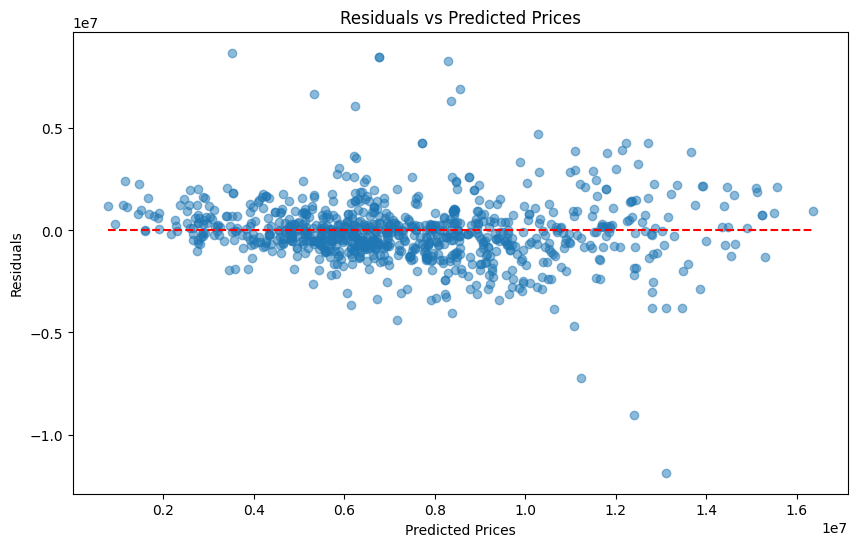

In [115]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()


In [117]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Evaluate RandomForestRegressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RandomForestRegressor Mean Squared Error: {mse_rf}")
print(f"RandomForestRegressor R-squared: {r2_rf}")


RandomForestRegressor Mean Squared Error: 2437682211822.0493
RandomForestRegressor R-squared: 0.7533154667729128


In [118]:
# Conclusion

# Performance Comparison

## Linear Regression:
- **Mean Squared Error (MSE):** 2,487,764,311,796.28
- **R-squared (R²) score:** 0.748
- **Root Mean Squared Error (RMSE):** 1,577,264.82
- **Mean Absolute Error (MAE):** 1,035,921.33

## Random Forest Regressor:
- **Mean Squared Error (MSE):** 2,437,682,211,822.05
- **R-squared (R²) score:** 0.753

## Analysis
- **MSE:** The Random Forest Regressor has a slightly lower MSE, suggesting that it is better at reducing the squared errors compared to Linear Regression.
- **R-squared (R²) Score:** The Random Forest Regressor has a slightly higher R² score, indicating it explains a slightly greater proportion of the variance in the target variable.
- **RMSE:** The Linear Regression model has a higher RMSE, indicating higher average error in the same units as the target variable compared to Random Forest.
- **MAE:** Only provided for Linear Regression, it indicates the average magnitude of errors.

## Conclusion
The Random Forest Regressor is performing better based on:
- Lower Mean Squared Error (MSE)
- Higher R-squared (R²) score


In [119]:
# Serializing the model (Random foresr Regresser)

In [120]:
import joblib

joblib.dump(rf_model, 'random_forest_regressor_model.pkl')

['random_forest_regressor_model.pkl']

In [131]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [121]:
# Loading and testing the model

In [122]:
loaded_model = joblib.load('random_forest_regressor_model.pkl')

In [123]:
loaded_model

RandomForestRegressor(random_state=42)

In [132]:
loaded_preprocessor = joblib.load('preprocessor.pkl')

In [133]:
loaded_preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(), ['area_insqft']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['property_type', 'location'])])

In [134]:
user_input = {
    'property_type': '2 BHK Apartment',
    'area_insqft': 1000,
    'location': 'Kundrathur'
}

In [135]:
input_data = pd.DataFrame([user_input])

In [136]:
input_data

,property_type,area_insqft,location
0,2 BHK Apartment,1000,Kundrathur


In [137]:
user_input_preprocessed = loaded_preprocessor.transform(input_data)

In [138]:
user_input_preprocessed

<1x241 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [142]:
predicted_price = loaded_model.predict(user_input_preprocessed)
print("Price Predicted :",predicted_price)

Price Predicted : [5537278.75]


In [143]:
# Enhancements

In [147]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import pandas as pd
import joblib

rf_model = joblib.load('random_forest_regressor_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')

form_style = """
<style>
    .widget-label {
        font-weight: bold;
        color: #4A4A4A;
    }
    .widget-button {
        background-color: #007BFF;
        color: white;
        border: none;
        border-radius: 5px;
        padding: 10px 20px;
        font-size: 16px;
        cursor: pointer;
    }
    .widget-button:hover {
        background-color: #0056b3;
    }
    .form-container {
        max-width: 600px;
        margin: auto;
        padding: 20px;
        border: 1px solid #ddd;
        border-radius: 10px;
        box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    }
</style>
"""

# Widgets
property_type_widget = widgets.Dropdown(
    options=['1 BHK Apartment', '2 BHK Apartment', '3 BHK Apartment', '4 BHK Villa', '3 BHK Villa', 'Independent House'],
    description='Property Type:',
    style={'description_width': 'initial'}
)

area_insqft_widget = widgets.FloatText(
    description='Area (sqft):',
    step=1,
    style={'description_width': 'initial'}
)

location_widget = widgets.Text(
    description='Location:',
    style={'description_width': 'initial'}
)

submit_button = widgets.Button(
    description='Predict Price',
    button_style='primary', 
    layout=widgets.Layout(width='auto', height='auto')
)

def on_button_click(b):
    input_data = pd.DataFrame({
        'property_type': [property_type_widget.value],
        'area_insqft': [area_insqft_widget.value],
        'location': [location_widget.value]
    })
    input_data_preprocessed = preprocessor.transform(input_data)
    predicted_price = rf_model.predict(input_data_preprocessed)[0]
    clear_output(wait=True)
    display(HTML(form_style))  
    print(f'Predicted Price: Rs:{predicted_price:,.2f}')
    display(property_type_widget, area_insqft_widget, location_widget, submit_button)

submit_button.on_click(on_button_click)

# Display the form
display(HTML(form_style))  
display(property_type_widget, area_insqft_widget, location_widget, submit_button)


Predicted Price: Rs5,537,278.75


Dropdown(description='Property Type:', index=1, options=('1 BHK Apartment', '2 BHK Apartment', '3 BHK Apartmen…

FloatText(value=1000.0, description='Area (sqft):', step=1.0, style=DescriptionStyle(description_width='initia…

Text(value='Kundrathur', description='Location:', style=TextStyle(description_width='initial'))

Button(button_style='primary', description='Predict Price', layout=Layout(height='auto', width='auto'), style=…

In [ ]:
# END